# Clustering Project on "customer.csv" Dataset:


## Objectives

After some data exploratory analysis, I will deploy three different clustering algorithms and visualize the results:

*   Use scikit-learn **K-Means** clustering and 
*   Use scikit-learn **DBSCAN** to do Density based clustering and Matplotlib to plot clusters
*   Use scikit-learn **Hierarchical** clustering and create dendograms to visualize the clustering
  


In [54]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [55]:
# Reading the dataset in and showing the head of the dataframe
customers = pd.read_csv('customer.csv')
customers.head(10)

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40
5,6,Female,22,17,76
6,7,Female,35,18,6
7,8,Female,23,18,94
8,9,Male,64,19,3
9,10,Female,30,19,72


## Exploratory Data Analysis:
Using the **info()** and **describe()** methods to see some statistics of the dataframe:

In [56]:
customers.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [57]:
customers.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


In [58]:
print('Null Values In Dataset: ', customers.isnull().sum())
print()
print('Duplicate Values In Dataset: ', customers.duplicated().sum())
print()

Null Values In Dataset:  CustomerID                0
Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

Duplicate Values In Dataset:  0



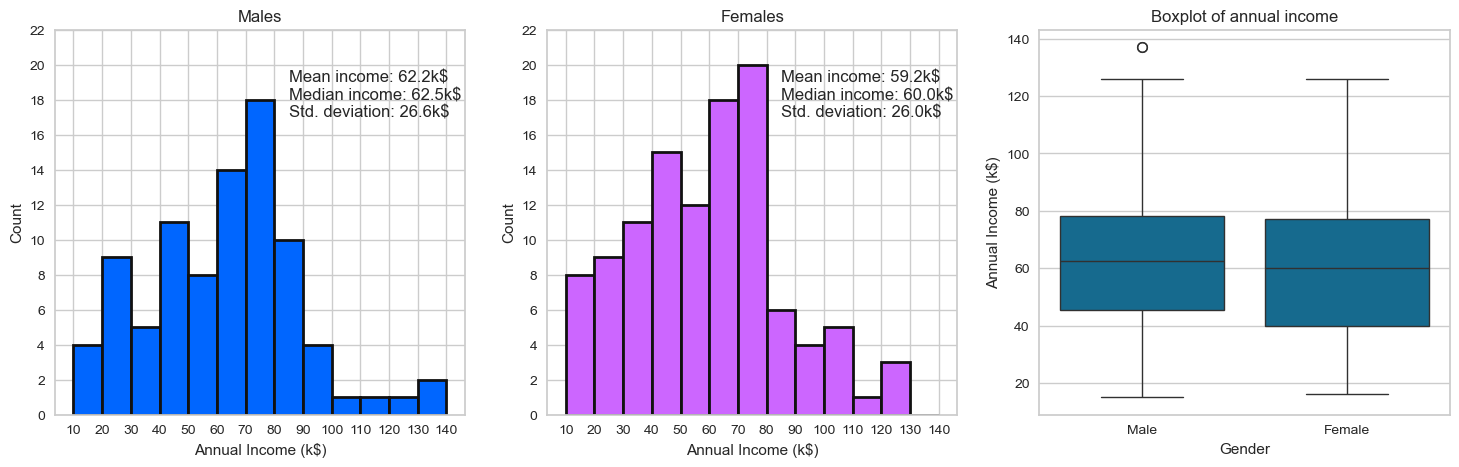

In [59]:
# Subsets with males' and females' annual income
males_income = customers[customers['Gender']=='Male']['Annual Income (k$)'] 
females_income = customers[customers['Gender']=='Female']['Annual Income (k$)'] 

my_bins = range(10,150,10)
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(18,5))

# Drawing males histogram
ax1.hist(males_income, bins=my_bins, color='#0066ff', edgecolor="k", linewidth=2)
ax1.set_xticks(my_bins)
ax1.set_yticks(range(0,24,2))
ax1.set_ylim(0,22)
ax1.set_title('Males')
ax1.set_xlabel('Annual Income (k$)')  
ax1.set_ylabel('Count')
ax1.text(85,19, "Mean income: {:.1f}k$".format(males_income.mean()))
ax1.text(85,18, "Median income: {:.1f}k$".format(males_income.median()))
ax1.text(85,17, "Std. deviation: {:.1f}k$".format(males_income.std()))

# Drawing females histogram
ax2.hist(females_income, bins=my_bins, color='#cc66ff', edgecolor="k", linewidth=2)
ax2.set_xticks(my_bins)
ax2.set_yticks(range(0,24,2))
ax2.set_ylim(0,22)
ax2.set_title('Females')
ax2.set_xlabel('Annual Income (k$)') 
ax2.set_ylabel('Count')
ax2.text(85,19, "Mean income: {:.1f}k$".format(females_income.mean()))
ax2.text(85,18, "Median income: {:.1f}k$".format(females_income.median()))
ax2.text(85,17, "Std. deviation: {:.1f}k$".format(females_income.std()))

# boxplot
sns.boxplot(x='Gender', y='Annual Income (k$)', data=customers, ax=ax3)
ax3.set_title('Boxplot of annual income')
plt.show()

Both Mean and median income of males is higher than females  (**$62.2 k$** vs **$59.2k$**). However, standard deviation is similar for both groups. There is one outlier in male group with an annual income of about 140k$. 

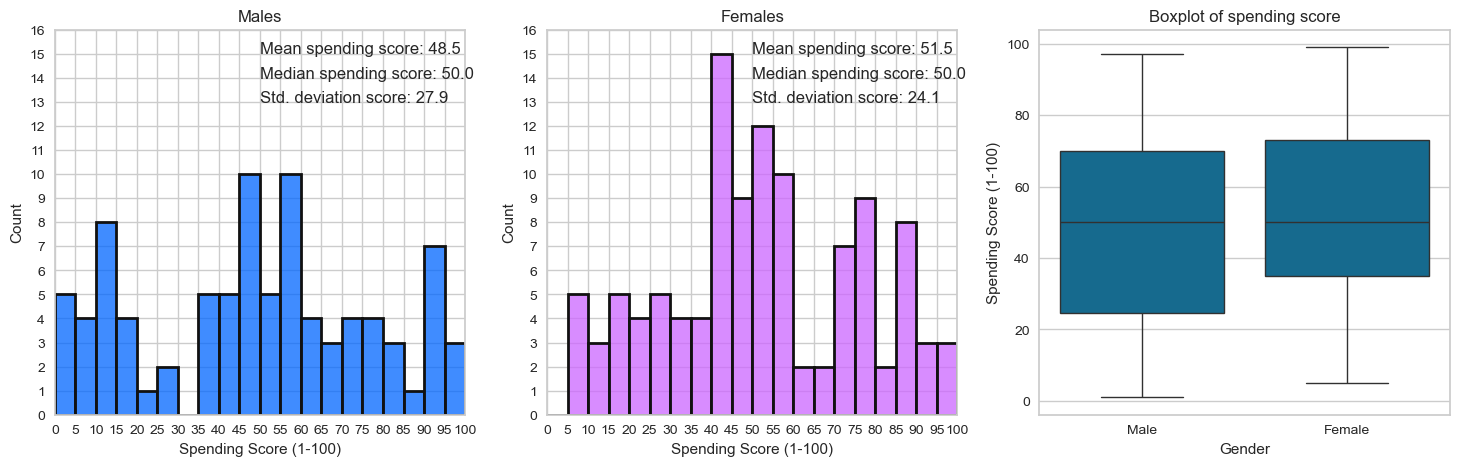

In [60]:
# Subsets with males' and females' spending score
males_spending = customers[customers['Gender']=='Male']['Spending Score (1-100)'] 
females_spending = customers[customers['Gender']=='Female']['Spending Score (1-100)']

spending_bins = range(0,105,5)

# males histogram
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(18,5))
sns.histplot(males_spending, bins=spending_bins, kde=False, color='#0066ff', ax=ax1, edgecolor="k", linewidth=2)
ax1.set_xticks(spending_bins)
ax1.set_xlim(0,100)
ax1.set_yticks(range(0,17,1))
ax1.set_ylim(0,16)
ax1.set_title('Males')
ax1.set_ylabel('Count')
ax1.text(50,15, "Mean spending score: {:.1f}".format(males_spending.mean()))
ax1.text(50,14, "Median spending score: {:.1f}".format(males_spending.median()))
ax1.text(50,13, "Std. deviation score: {:.1f}".format(males_spending.std()))

# females histogram
sns.histplot(females_spending, bins=spending_bins, kde=False, color='#cc66ff', ax=ax2, edgecolor="k", linewidth=2)
ax2.set_xticks(spending_bins)
ax2.set_xlim(0,100)
ax2.set_yticks(range(0,17,1))
ax2.set_ylim(0,16)
ax2.set_title('Females')
ax2.set_ylabel('Count')
ax2.text(50,15, "Mean spending score: {:.1f}".format(females_spending.mean()))
ax2.text(50,14, "Median spending score: {:.1f}".format(females_spending.median()))
ax2.text(50,13, "Std. deviation score: {:.1f}".format(females_spending.std()))

# boxplot
sns.boxplot(x='Gender', y='Spending Score (1-100)', data=customers, ax=ax3)
ax3.set_title('Boxplot of spending score')
plt.show()

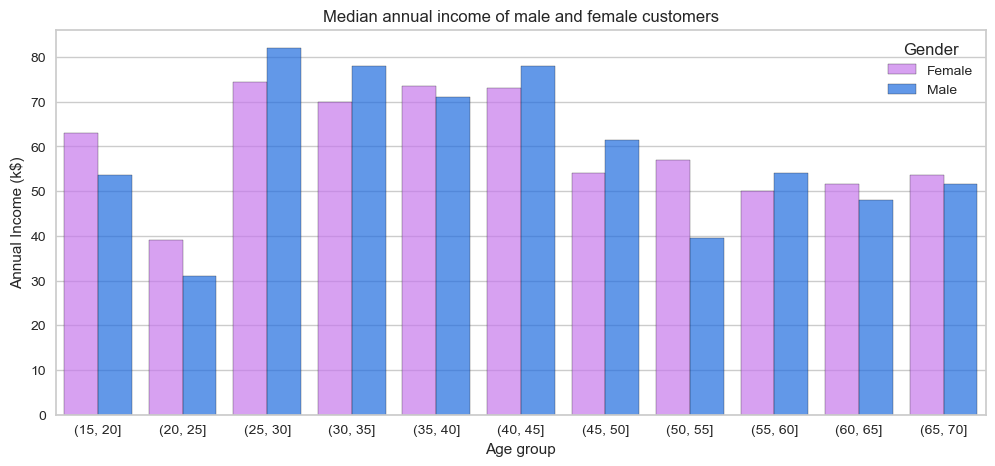

In [61]:
age_bins = range(15,75,5)

medians_by_age_group = customers.groupby(["Gender",pd.cut(customers['Age'], age_bins)]).median()
medians_by_age_group.index = medians_by_age_group.index.set_names(['Gender', 'Age_group'])
medians_by_age_group.reset_index(inplace=True)


fig, ax = plt.subplots(figsize=(12, 5))

sns.barplot(x='Age_group', y='Annual Income (k$)', hue='Gender', data=medians_by_age_group,
            palette=['#cc66ff','#0066ff'],
            alpha=0.7,edgecolor='k',
            ax=ax)
ax.set_title('Median annual income of male and female customers')
ax.set_xlabel('Age group')
plt.show()

It is clear from the barchart above that the most wealthy customers are in age of **25-45 years old** and the largest gap between women and men is within age groups **25-30** where men are richer and **50-55** vice versa!

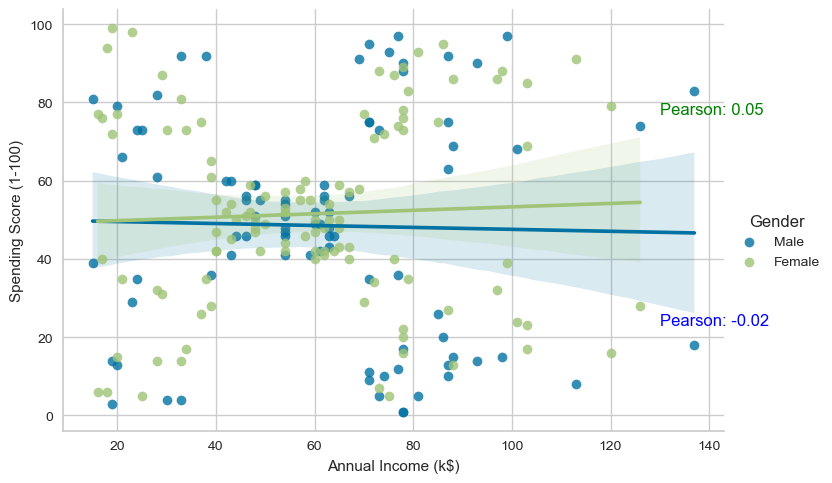

In [62]:
from scipy.stats import pearsonr

# Calculating Pearson's correlations
corr1, _ = pearsonr(males_income.values, males_spending.values)
corr2, _ = pearsonr(females_income.values, females_spending.values)

sns.lmplot(x='Annual Income (k$)', y='Spending Score (1-100)', data=customers, hue='Gender', aspect=1.5)

plt.text(130,23, 'Pearson: {:.2f}'.format(corr1), color='blue')
plt.text(130,77, 'Pearson: {:.2f}'.format(corr2), color='green')

plt.show()

**For both sex groups there is no significant correlation between annual income and spending score of customers.**

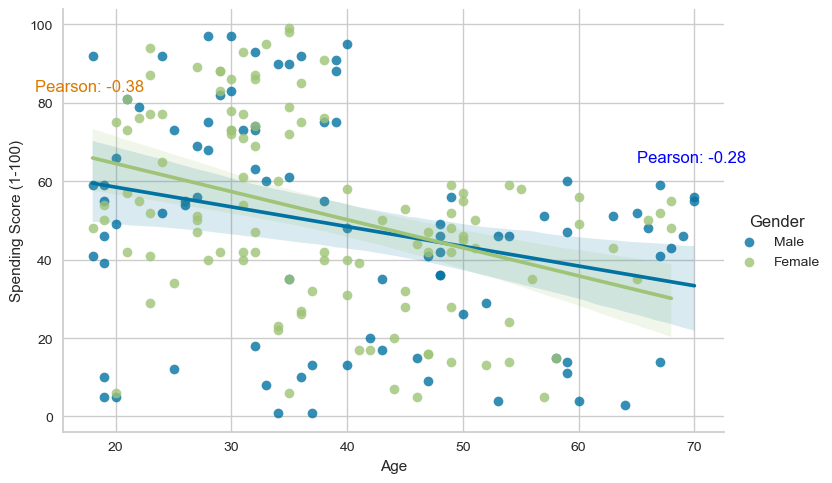

In [63]:
# Subsets with males' and females' age
males_age = customers[customers['Gender']=='Male']['Age'] 
females_age = customers[customers['Gender']=='Female']['Age'] 

# calculating Pearson's correlations
corr1, _ = pearsonr(males_age.values, males_spending.values)
corr2, _ = pearsonr(females_age.values, females_spending.values)

sns.lmplot(x='Age', y='Spending Score (1-100)', data=customers, hue='Gender', aspect=1.5)

plt.text(65,65, 'Pearson: {:.2f}'.format(corr1), color='blue')
plt.text(13,83, 'Pearson: {:.2f}'.format(corr2), color='#d97900')

plt.show()

**There are week negative correlations (<0.5) between age and spending score for both sex groups.**

# Implementing Different Clustering Algorithms with Visualizations

## K-Means Clustering:

In [64]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score

In [65]:
X = customers[['Age', 'Annual Income (k$)','Spending Score (1-100)']]

In [66]:
scaler = StandardScaler() 

In [67]:
scaler.fit_transform(X)
scaler

StandardScaler()

In order to find an appropriate number of clusters, the **elbow method** or the **silhuette score** could be be used. I will show both methods and I will choose the inertia for a number of clusters between 2 and 10 for this project. Generally, the rule is to choose the number of clusters where we see a **kink or "an elbow"** in the graph or the higher **silhuette score**:

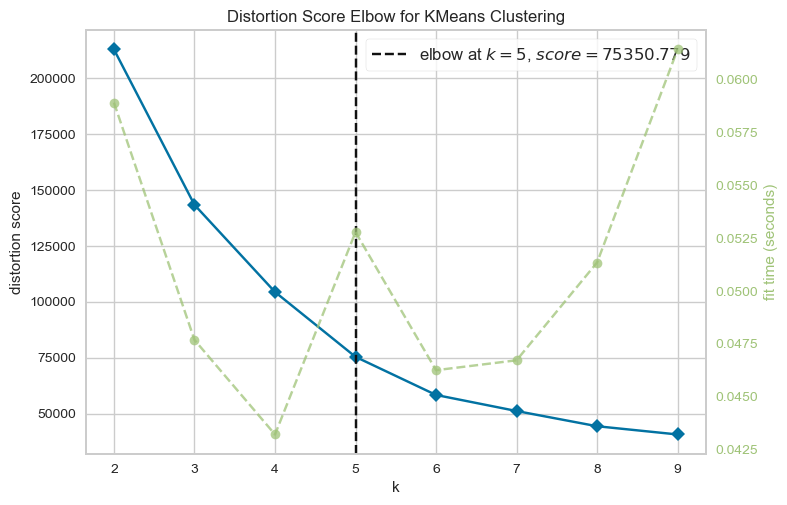

In [68]:
# Importing the elbow visualizer
from yellowbrick.cluster import KElbowVisualizer
import warnings

# Suppress all warnings
warnings.filterwarnings("ignore")

model = KMeans(random_state=1)
visualizer = KElbowVisualizer(model, k=(2,10))

visualizer.fit(X)
visualizer.show()
plt.show()

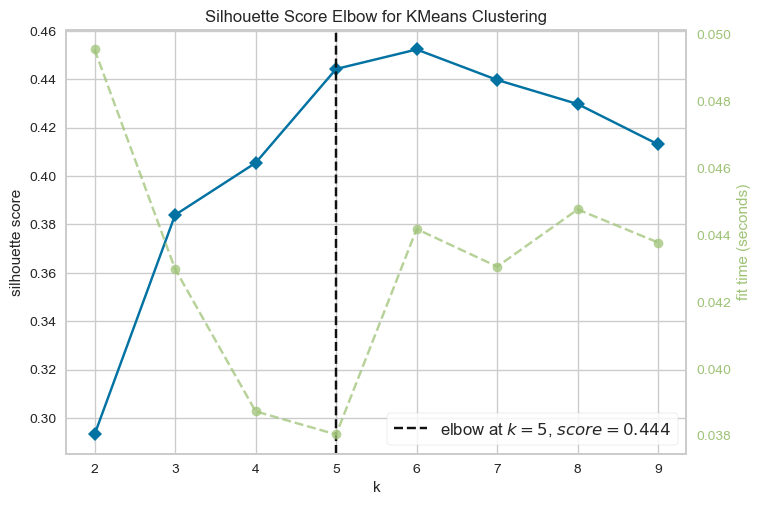

In [69]:
model = KMeans(random_state=1)
visualizer = KElbowVisualizer(model, k=(2,10), metric='silhouette')

visualizer.fit(X)
visualizer.show()
plt.show()

Both graphs above would suggest that **k=5** seems to be a reasonable choice for number of clusters!

In [70]:
# Creating an instance of KMeans model and fitting the features
Kmeans_Model = KMeans(n_clusters=5, init='k-means++')
Kmeans_Model.fit(X)

KMeans(n_clusters=5)

In [71]:
# Showing the cluster labels for each data point
Kmeans_Model.labels_

array([2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3,
       2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3,
       2, 3, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4,
       4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4,
       4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4,
       4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 0, 1, 0, 4, 0, 1, 0, 1, 0,
       1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0,
       1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0,
       1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0,
       1, 0], dtype=int32)

In [72]:
# appending labels to data points
X.loc[:,'Cluster'] = Kmeans_Model.labels_

## Visualization of Clusters:

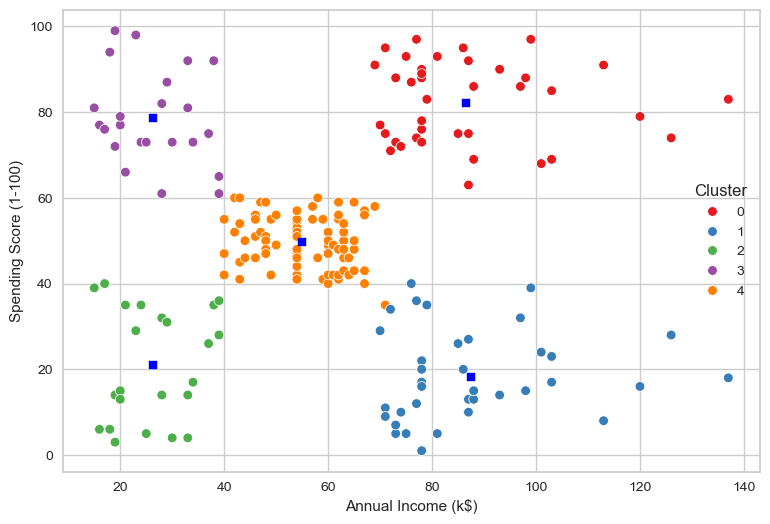

In [73]:
fig1, ax = plt.subplots(figsize=(9, 6))

scat_1 = sns.scatterplot(x='Annual Income (k$)', y='Spending Score (1-100)', data=X, hue='Cluster', 
                         ax=ax, palette='Set1', legend='full')

ax.scatter(Kmeans_Model.cluster_centers_[:, 1], Kmeans_Model.cluster_centers_[:, 2], marker='s', s=40, c="blue")
plt.show()

It is clear that there are 5 distinct clusters:

clients with **low annual income** and **high spending score**

clients with **medium annual income** and **medium spending score**

clients with **high annual income** and **low spending score**

clients with **high annual income** and **high spending score**

clients with **low annual income** and **low spending score**

In [74]:
# Size of the clusters
size = X.groupby('Cluster').size().to_frame()
size.columns = ["KM_size"]
size

,KM_size
Cluster,
0,39
1,37
2,23
3,23
4,78


**Below is the 3D visualization of the clusters created by our K-Means model:**

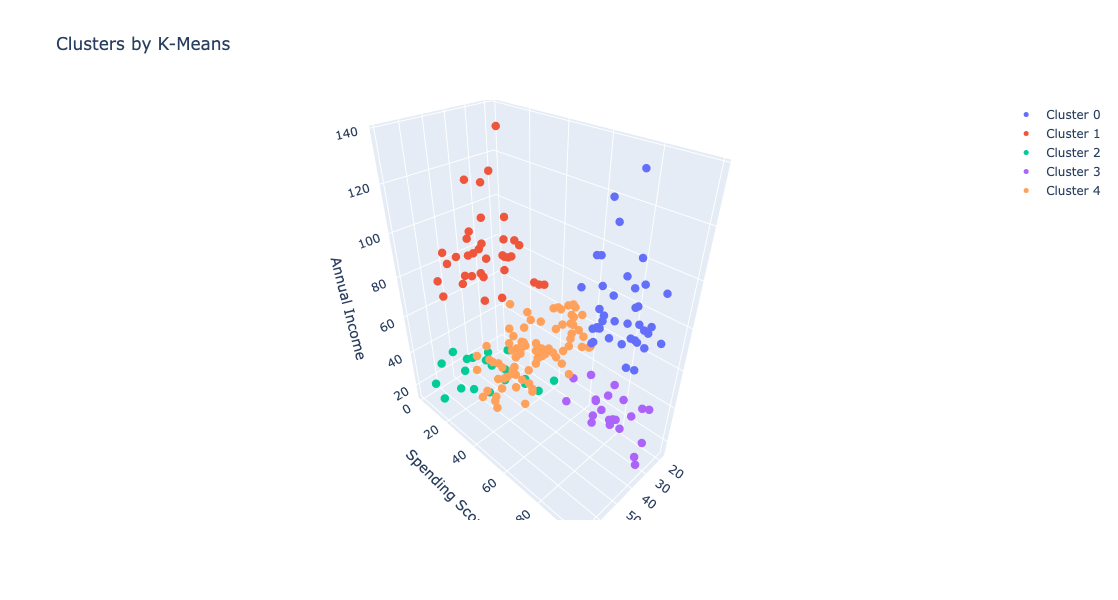

In [75]:
import plotly as py
import plotly.graph_objs as go

def tracer(db, n, name):
    '''
    This function returns trace object for Plotly
    '''
    return go.Scatter3d(
        x = db[db['Cluster']==n]['Age'],
        y = db[db['Cluster']==n]['Spending Score (1-100)'],
        z = db[db['Cluster']==n]['Annual Income (k$)'],
        mode = 'markers',
        name = name,
        marker = dict(
        size = 5
        )
     )

trace0 = tracer(X, 0, 'Cluster 0')
trace1 = tracer(X, 1, 'Cluster 1')
trace2 = tracer(X, 2, 'Cluster 2')
trace3 = tracer(X, 3, 'Cluster 3')
trace4 = tracer(X, 4, 'Cluster 4')

data = [trace0, trace1, trace2, trace3, trace4]

layout = go.Layout(title='Clusters by K-Means',
                   scene=dict(
                       xaxis=dict(title='Age'),
                       yaxis=dict(title='Spending Score'),
                       zaxis=dict(title='Annual Income')
                   ),
                   width=800, 
                   height=600  
                   )

fig = go.Figure(data=data, layout=layout)
py.offline.iplot(fig)

## 2-DBSCAN:

In [76]:
from sklearn.cluster import DBSCAN
from itertools import product

In [77]:
X = customers[['Age', 'Annual Income (k$)','Spending Score (1-100)']]

**Epsilon** determine a specified radius that if includes enough number of points within, we call it dense area and 
**minimumSamples** determine the minimum number of data points we want in a neighborhood to define a cluster.

In [78]:
# eps and min_samples values to be investigated
eps_values = np.arange(8, 12.25, 0.25) 
min_samples = np.arange(3, 10) 

DBSCAN_params = list(product(eps_values, min_samples))

In [79]:
num_of_clusters = []
sil_score = []

for p in DBSCAN_params:
    DBS_clustering = DBSCAN(eps=p[0], min_samples=p[1]).fit(X)
    num_of_clusters.append(len(np.unique(DBS_clustering.labels_)))
    sil_score.append(silhouette_score(X, DBS_clustering.labels_))

**A heatplot below shows how many clusters were generated by the DBSCAN algorithm for the respective parameters combinations.**

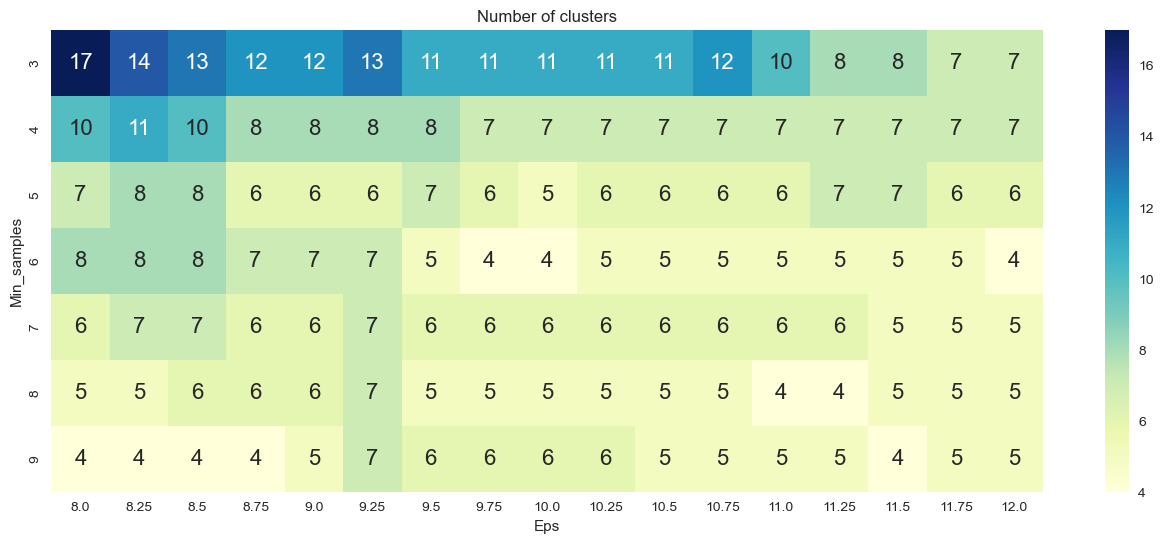

In [80]:
# Creating the heatmap for DBSCAN respective parameters combinations
tmp = pd.DataFrame.from_records(DBSCAN_params, columns =['Eps', 'Min_samples'])   
tmp['No_of_clusters'] = num_of_clusters

pivot_1 = pd.pivot_table(tmp, values='No_of_clusters', index='Min_samples', columns='Eps')

fig, ax = plt.subplots(figsize=(16,6))
sns.heatmap(pivot_1, annot=True,annot_kws={"size": 16}, cmap="YlGnBu", ax=ax)
ax.set_title('Number of clusters')
plt.show()

Although the number of clusters vary from **17 to 4**, the most of the combinations gives **4-7 clusters**. To decide which combination to choose I will use the **silhuette score** which is a metric, and I will plot it as a heatmap again:

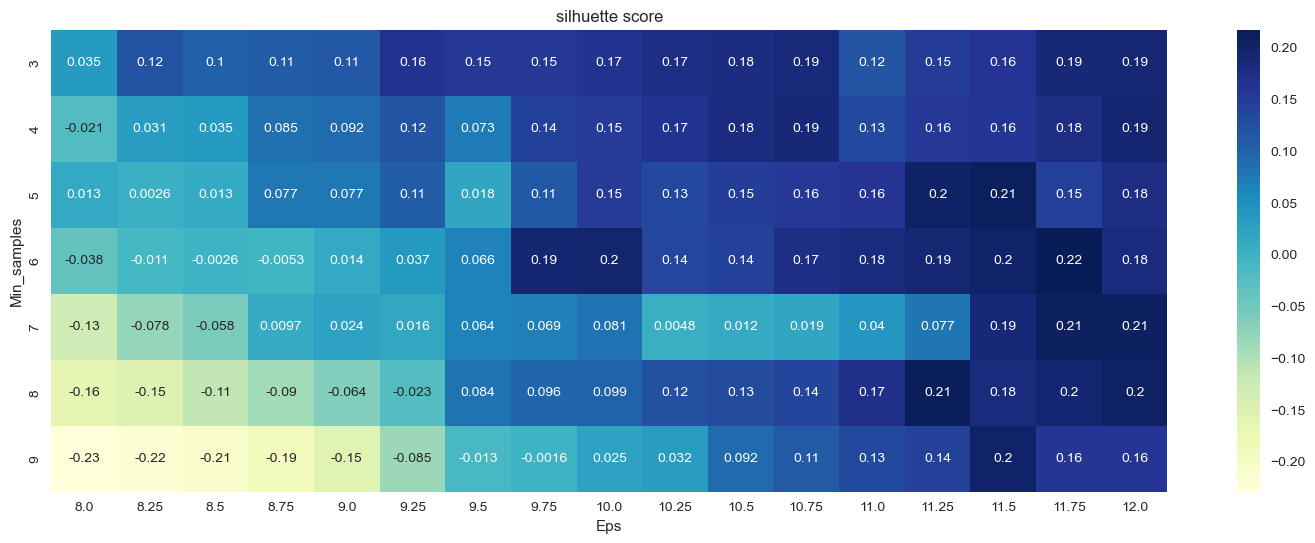

In [81]:
tmp = pd.DataFrame.from_records(DBSCAN_params, columns =['Eps', 'Min_samples'])   
tmp['Sil_score'] = sil_score

pivot_1 = pd.pivot_table(tmp, values='Sil_score', index='Min_samples', columns='Eps')

fig, ax = plt.subplots(figsize=(18,6))
sns.heatmap(pivot_1, annot=True, annot_kws={"size": 10}, cmap="YlGnBu", ax=ax)
ax.set_title('silhuette score')
plt.show()

As it is clear from the heatmap above, the global maximum is **0.26** for **eps=12.5 and min_samples=4**

In [82]:
DBS_clustering = DBSCAN(eps=12.5, min_samples=4).fit(X)
DBSCAN_clustered = X.copy()

# append labels to points
DBSCAN_clustered.loc[:, 'Cluster'] = DBS_clustering.labels_ 

In [83]:
# Checking sizes of clusters
DBSCAN_clust_sizes = DBSCAN_clustered.groupby('Cluster').size().to_frame()
DBSCAN_clust_sizes.columns = ["DBSCAN_size"]
DBSCAN_clust_sizes

,DBSCAN_size
Cluster,
-1,18
0,112
1,8
2,34
3,24
4,4


**The dataframe above shows that the DBSCAN model has created 5 clusters plus outliers cluster (-1)**

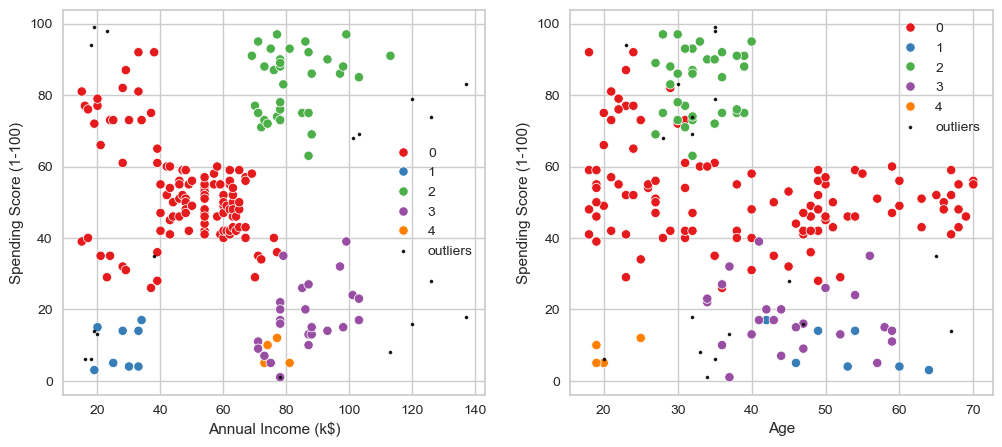

In [84]:
outliers = DBSCAN_clustered[DBSCAN_clustered['Cluster']==-1]

fig2, (axes) = plt.subplots(1,2,figsize=(12,5))


sns.scatterplot(x='Annual Income (k$)', y='Spending Score (1-100)',
                    data=DBSCAN_clustered[DBSCAN_clustered['Cluster'] != -1],
                    hue='Cluster', ax=axes[0], palette='Set1', legend='full', s=45)

sns.scatterplot(x='Age', y='Spending Score (1-100)',
                    data=DBSCAN_clustered[DBSCAN_clustered['Cluster'] != -1],
                    hue='Cluster', palette='Set1', ax=axes[1], legend='full', s=45)

axes[0].scatter(outliers['Annual Income (k$)'], outliers['Spending Score (1-100)'], s=5, label='outliers', c="k")
axes[1].scatter(outliers['Age'], outliers['Spending Score (1-100)'], s=5, label='outliers', c="k")
axes[0].legend()
axes[1].legend()

plt.setp(axes[0].get_legend().get_texts(), fontsize='10')
plt.setp(axes[1].get_legend().get_texts(), fontsize='10')

plt.show()

From the visualization above, we can see that graphing **'Spending Score' vs 'Annual Income'** gives us a better clustering result than the **'Spending Score' vs 'Age'**

## 3- Hierarchical clustering:

In [85]:
from sklearn.cluster import AgglomerativeClustering
from sklearn.metrics.pairwise import euclidean_distances
import pylab
from scipy.cluster import hierarchy

In [86]:
X = customers[['Annual Income (k$)','Spending Score (1-100)']]

In [87]:
scaler = StandardScaler() 

In [88]:
# Scaling and assigning the scaled features to feature_mtx variable
feature_mtx = scaler.fit_transform(X)
feature_mtx[0:5]

array([[-1.73899919, -0.43480148],
       [-1.73899919,  1.19570407],
       [-1.70082976, -1.71591298],
       [-1.70082976,  1.04041783],
       [-1.66266033, -0.39597992]])

In [89]:
# Calculating the distance matrix based on the euclidean distance between datapoints
dist_matrix = euclidean_distances(feature_mtx,feature_mtx) 
print(dist_matrix)

[[0.         1.63050555 1.28167999 ... 4.44935328 4.72749573 4.96007568]
 [1.63050555 0.         2.91186723 ... 4.24551281 5.25987762 4.65731761]
 [1.28167999 2.91186723 0.         ... 4.95958139 4.64193658 5.50147501]
 ...
 [4.44935328 4.24551281 4.95958139 ... 0.         2.21418015 0.54622499]
 [4.72749573 5.25987762 4.64193658 ... 2.21418015 0.         2.52340145]
 [4.96007568 4.65731761 5.50147501 ... 0.54622499 2.52340145 0.        ]]


In [90]:
Z_using_dist_matrix = hierarchy.linkage(dist_matrix, 'ward')

### Dendrogram visualization:

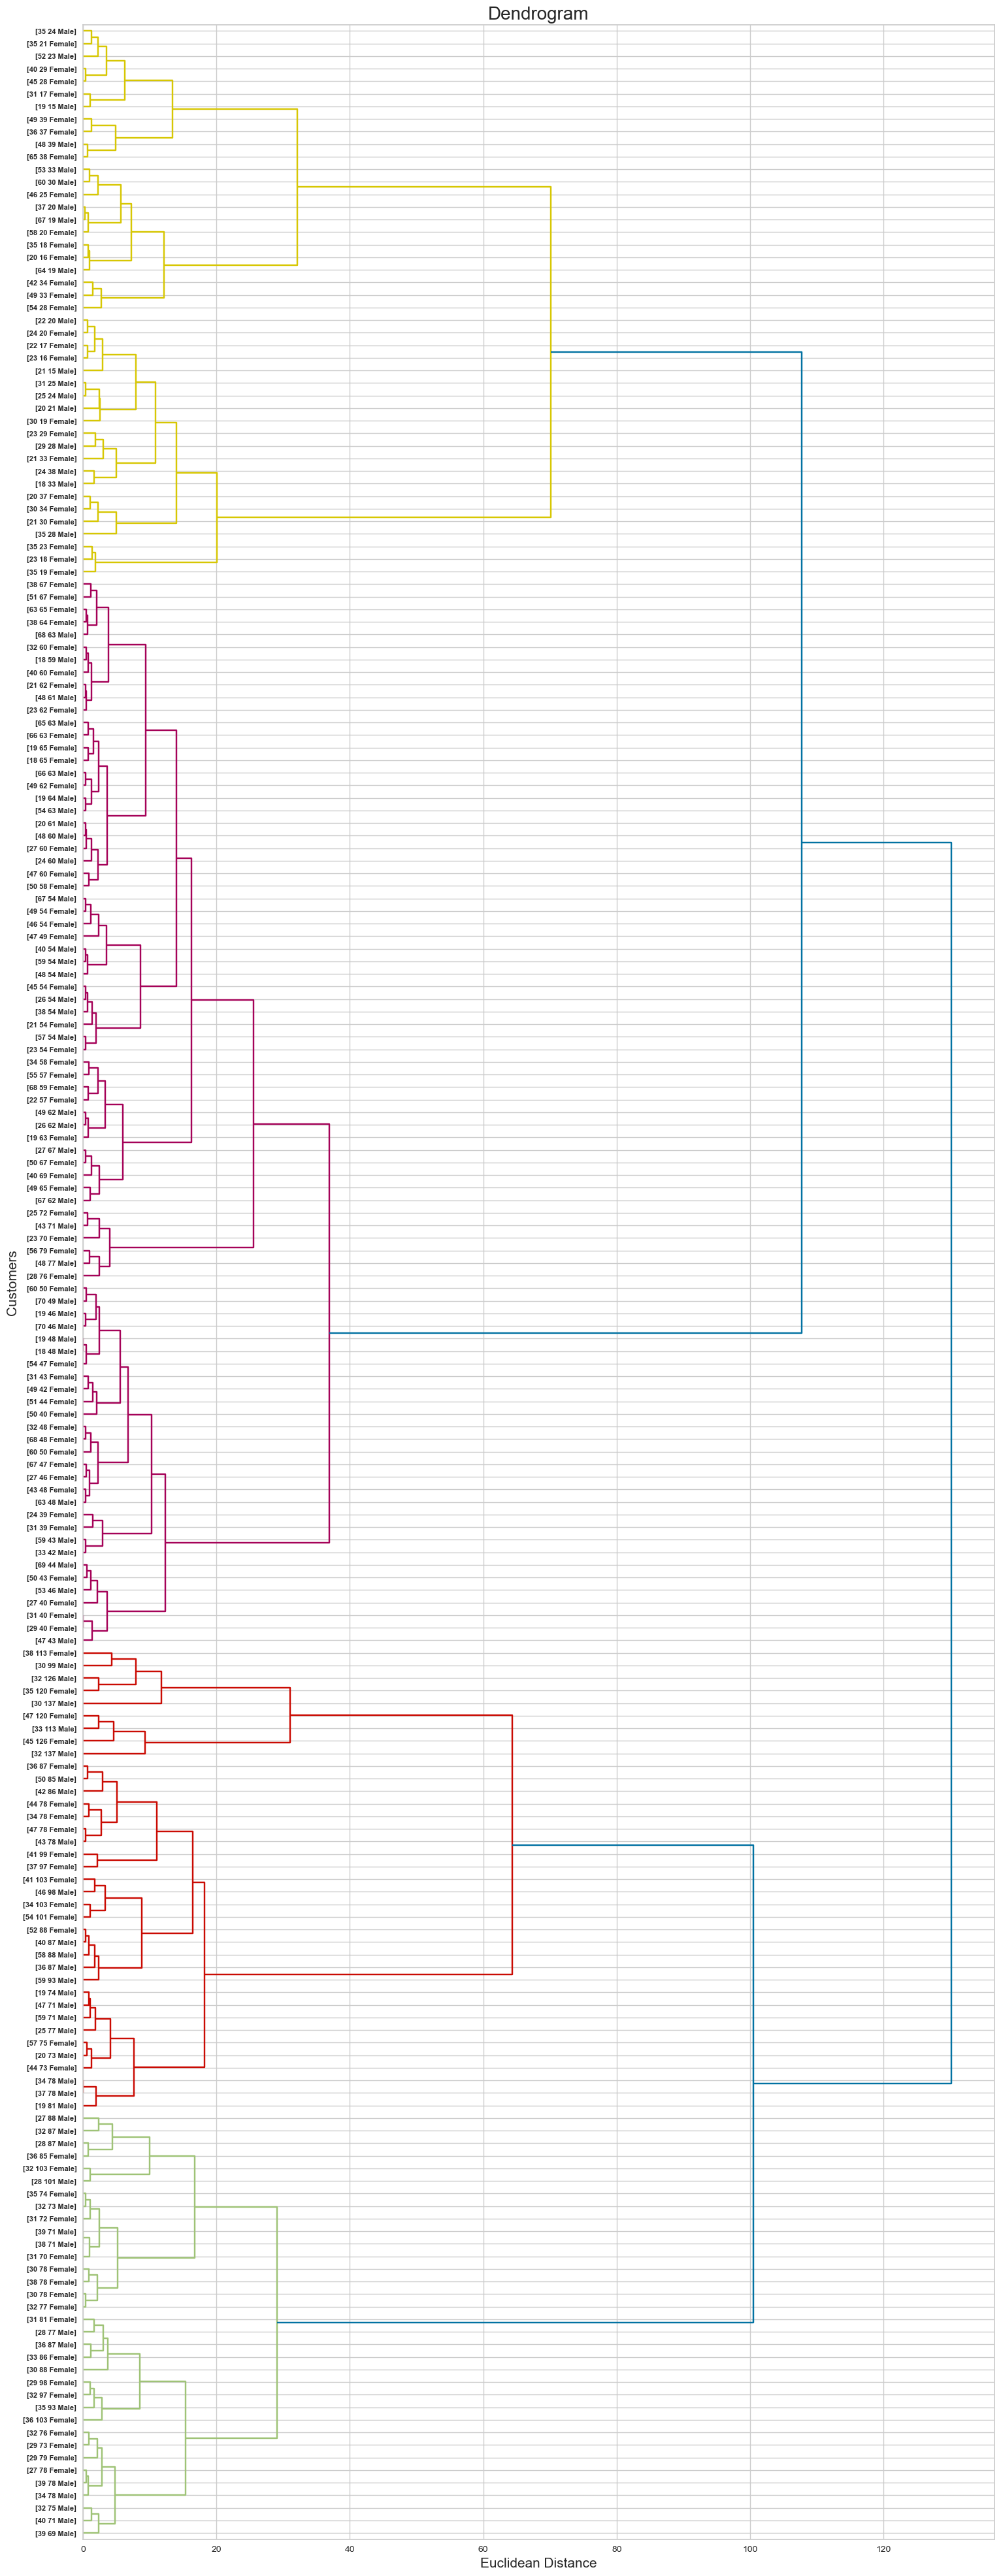

In [91]:
# Creating a hierarchical clustering linkage matrix using the complete-linkage method
Z_using_dist_matrix = hierarchy.linkage(dist_matrix, 'ward')

# Define the leaf label function to include 'Age' and 'Annual Income'
def llf(id):
    age = int(customers['Age'][id])
    income = int(customers['Annual Income (k$)'][id])
    return '[%s %s %s]' % (customers['Age'][id], customers['Annual Income (k$)'][id], customers['Gender'][id])

# Vertical dendrogram
fig = plt.figure(figsize=(18, 50))
dendrogram = hierarchy.dendrogram(Z_using_dist_matrix, leaf_label_func=llf, orientation='right')

# Increase the size and boldness of y-axis labels
plt.tick_params(axis='y', labelsize=8)

# Make y-axis labels bold
for label in plt.gca().get_yticklabels():
    label.set_fontweight('bold')
    
plt.title('Dendrogram', fontsize=20)
plt.xlabel('Euclidean Distance', fontsize=15)
plt.ylabel('Customers', fontsize=15)
plt.show()

Now, we can use the 'AgglomerativeClustering' function from scikit-learn library to cluster the dataset. The AgglomerativeClustering performs a hierarchical clustering using a bottom up approach. The linkage criteria determines the metric used for the merge strategy:

*   Ward minimizes the sum of squared differences within all clusters. It is a variance-minimizing approach and in this sense is similar to the k-means objective function but tackled with an agglomerative hierarchical approach.
*   Maximum or complete linkage minimizes the maximum distance between observations of pairs of clusters.
*   Average linkage minimizes the average of the distances between all observations of pairs of clusters.

In [92]:
aggCluster = AgglomerativeClustering(n_clusters = 5, affinity = 'euclidean', linkage = 'ward')
labels = aggCluster.fit_predict(dist_matrix)

labels

array([1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4,
       1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 2,
       1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 3, 2, 3, 2, 3, 0, 3, 0, 3,
       2, 3, 0, 3, 0, 3, 0, 3, 0, 3, 2, 3, 0, 3, 2, 3, 0, 3, 0, 3, 0, 3,
       0, 3, 0, 3, 0, 3, 2, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3,
       0, 3, 0, 3, 0, 3, 0, 3, 0, 0, 0, 3, 0, 3, 0, 3, 0, 0, 0, 0, 0, 0,
       0, 0])

In [93]:
# Adding the cluster labels as a new column to our dataframe
customers['cluster_'] = labels
customers.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100),cluster_
0,1,Male,19,15,39,1
1,2,Male,21,15,81,4
2,3,Female,20,16,6,1
3,4,Female,23,16,77,4
4,5,Female,31,17,40,1


## Visualizing Clusters:

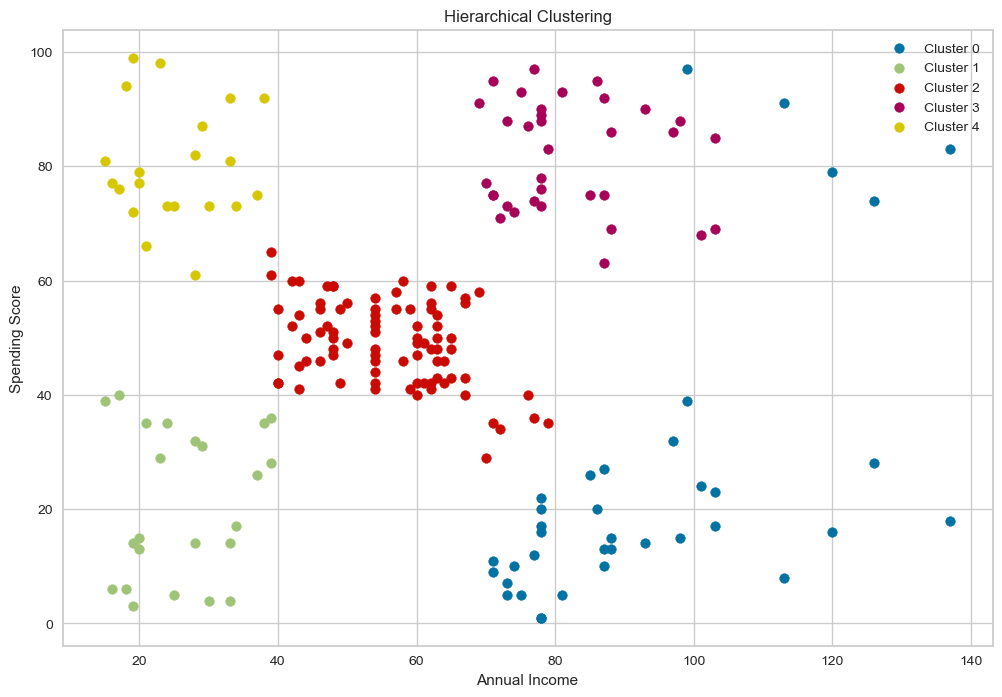

In [94]:
# Visualize the clusters
plt.figure(figsize=(12, 8))

# Scatter plot for each cluster
for cluster_num in range(5):
    plt.scatter(X[labels == cluster_num]['Annual Income (k$)'], 
                X[labels == cluster_num]['Spending Score (1-100)'],
                label=f'Cluster {cluster_num}')

plt.title('Hierarchical Clustering')
plt.xlabel('Annual Income')
plt.ylabel('Spending Score')
plt.legend()
plt.show()

In [95]:
# To see the gender distribution in each cluster
customers.groupby(['cluster_','Gender'])['cluster_'].count()

cluster_  Gender
0         Female    16
          Male      21
1         Female    14
          Male       9
2         Female    51
          Male      34
3         Female    19
          Male      15
4         Female    12
          Male       9
Name: cluster_, dtype: int64

**Now we can look at the characteristics of each cluster:**

In [96]:
clusters_Stat = customers.groupby(['cluster_', 'Gender'])[['Age', 'Annual Income (k$)', 'Spending Score (1-100)']].mean()
clusters_Stat

Age  Annual Income (k$)  Spending Score (1-100)
cluster_ Gender                                                       
0        Female  42.875000           96.187500               28.687500
         Male    37.666667           91.285714               22.095238
1        Female  43.214286           27.357143               21.714286
         Male    48.333333           24.666667               19.666667
2        Female  40.509804           55.784314               48.647059
         Male    45.441176           55.852941               49.852941
3        Female  31.736842           82.842105               81.315789
         Male    33.800000           80.400000               82.266667
4        Female  25.583333           24.583333               81.833333
         Male    25.000000           25.777778               77.666667

Let's interpret the above table:

**Men**:

*   Cluster 0: with the most **Annual Income** on average.
*   Cluster 1: with the most **Average Age** , but the least **Spending Score** and **Annual Income**.
*   Cluster 3: with the most **Spending Score**.



**Women**:

*   Cluster 0: with the most **Annual Income** on average, the most **Spending Score**
*   Cluster 1: with the most **Average Age** , but the least **Spending Score** and one of the least **Annual Incomes**.
*   Cluster 4: with the most **Spending Score**, yet the least **Annual Incomes**.

Please notice that we did not use **Gender**  and **Age** of customers in the clustering process, but Hierarchical clustering could forge the clusters and discriminate them with quite a high accuracy.